# Boston Housing Market Data

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [19]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#Reads the online file provided by the URL above
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:
- TOWN - identifier for each town in the data set

- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [3]:
headers = ["TOWN","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT","MEDV"]
print("headers\n", headers)

headers
 ['TOWN', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


In [4]:
#show the first few rows to see if data imported correctly
boston_df.columns = headers
boston_df.head()

,TOWN,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
#show count, mean, standard deviation, min, 25%, 50%, 75%, and max of all columns
boston_df.describe()

,TOWN,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Visualization of Data

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  bar plot for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable



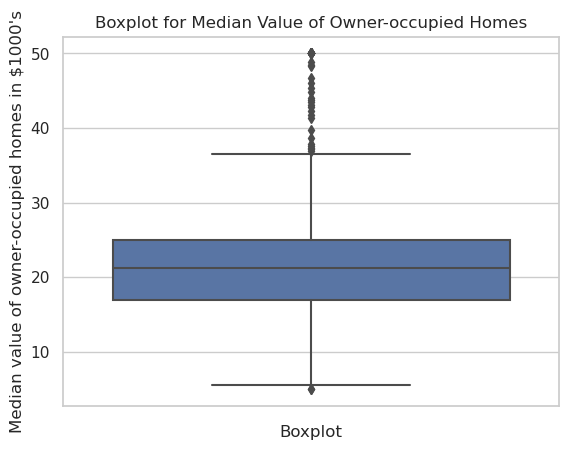

In [6]:
#Boxplot for the median value of owner occupied homes
sns.set(style="whitegrid")
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel = "Median value of owner-occupied homes in $1000's",
       xlabel = "Boxplot",
       title = "Boxplot for Median Value of Owner-occupied Homes")
pyplot.show()

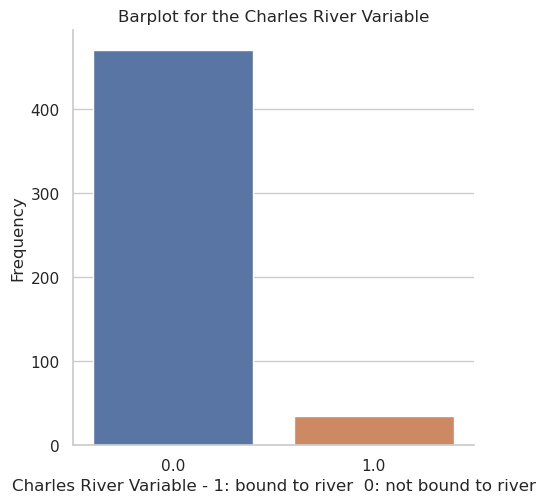

In [7]:
#Barplot for the Charles River variable
ax = sns.catplot(x="CHAS", kind="count", data=boston_df)
ax.set( xlabel = "Charles River Variable - 1: bound to river  0: not bound to river",
        ylabel = "Frequency",
        title = "Barplot for the Charles River Variable")
pyplot.show()

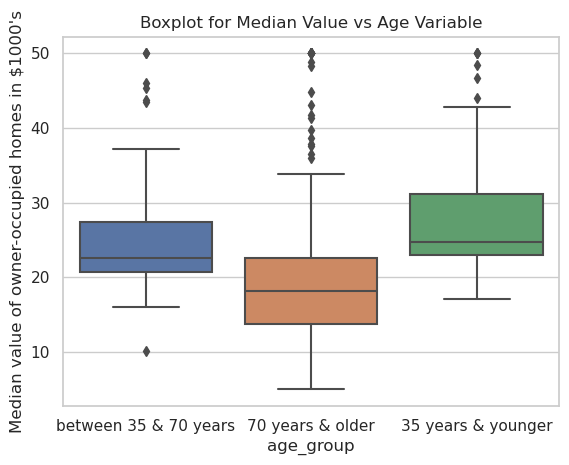

In [8]:
#Boxplot for median valus vs age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years & younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years & older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
ax.set(ylabel = "Median value of owner-occupied homes in $1000's",
       title = "Boxplot for Median Value vs Age Variable")
pyplot.show()

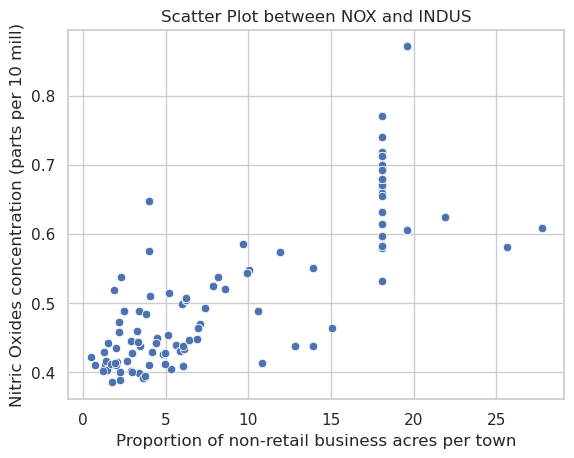

In [9]:
#Scatter plot between NOX and INDUS
ax = sns.scatterplot(x = 'INDUS', y = 'NOX', data=boston_df)
ax.set(xlabel = "Proportion of non-retail business acres per town",
       ylabel = "Nitric Oxides concentration (parts per 10 mill)",
       title = "Scatter Plot between NOX and INDUS")
pyplot.show()

The scatter plot above shows a positive correlation between nitric oxides and proportion of non-retail business acres per town since there is a linear relationship between them.

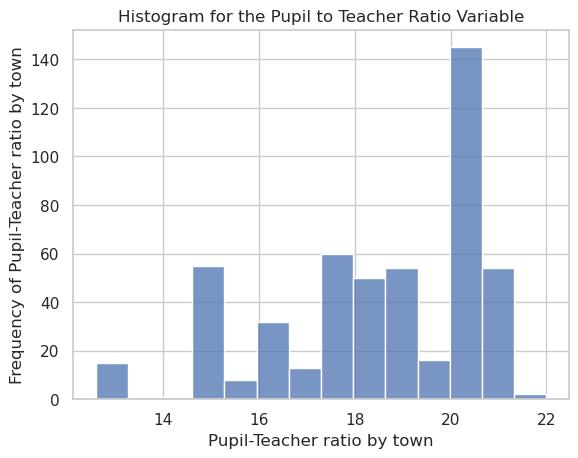

In [10]:
#Histogram for the pupil to teacher ratio variable
ax = sns.histplot(x = 'PTRATIO', data=boston_df)
ax.set(xlabel = "Pupil-Teacher ratio by town",
       ylabel = "Frequency of Pupil-Teacher ratio by town",
       title = "Histogram for the Pupil to Teacher Ratio Variable")
pyplot.show()

## Statistical Tests

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-Test)

Hypothesis:

- H0:µ1=µ2 ("there is no difference in median value of houses bounded by the Charles river")
- H1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")

Notes:
- α = 0.05 for all the following questions

In [11]:
#Levene Test for significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [12]:
#T-test for significance
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion**: Due to the p-value being less than .05 we reject the null hypothesis. There is a stastical difference in Median value of owner-occupied homes based on Charles river variable

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

- H0:µ1=µ2=µ3(the three population means are equal)
- H1:At least one of the means differ

In [15]:
#Levene Test for significance
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years & younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 & 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years & older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [16]:
#ANOVA Test for significance
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years & younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 & 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years & older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Due to the p-value being less than .05 we reject the null hypothesis since there is evidence that one of the means differ

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?(Pearson Correlation)

Hypothesis:

- H0: doesn't correlate
- H1: correlates

In [17]:
#Pearson correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion**: Due to the p-value being less than .05, we reject the null hypothesis and come to a conclusion there is a correlation between Nitric oxide and proportion of non-retail acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?(Regressional Analysis)

Hypothesis:

- H0: Distance is not correlated to Median value of households
- H1: Distance is correlated to Median value of households

In [20]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.21e-08
Time:                        02:24:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: Due to the p-value being less than .05, we reject the null hypothesis and confirm there is a correlation between distance from the 5 employment centers and the median value of a household